<a href="https://colab.research.google.com/github/isabmoreeno/Cinema_Acessibilidade_Brasil/blob/main/03_analise_final_cinema.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Final – Acessibilidade Econômica ao Cinema no Brasil

Este notebook apresenta a análise final do projeto, integrando dados socioeconômicos
do IBGE com o preço médio do ingresso de cinema, para avaliar quantas pessoas
conseguem acessar o cinema atualmente no Brasil.

A análise busca entender desigualdades regionais e identificar padrões de exclusão
econômica no acesso à cultura.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [3]:
arquivo = 'Tabela Per Capita-Brasil.xlsx'

df_municipios = pd.read_excel(arquivo, sheet_name='Municípios')
df_estados = pd.read_excel(arquivo, sheet_name='Estados')

df_municipios.head(), df_estados.head()

(                Município  UF  Rendimento (R$)
 0  Alta Floresta D'Oeste   RO          1210.60
 1              Ariquemes   RO          1458.57
 2                 Cabixi   RO          1323.79
 3                 Cacoal   RO          1625.88
 4             Cerejeiras   RO          1554.33,
      Estado  UF  Rendimento (R$)
 0      Acre  AC          1067.93
 1   Alagoas  AL          1034.94
 2     Amapá  AP          1142.15
 3  Amazonas  AM           979.58
 4     Bahia  BA          1079.17)

In [4]:
df_municipios.columns = ['municipio', 'uf', 'renda_per_capita']
df_estados.columns = ['estado', 'uf', 'renda_per_capita']

df_municipios.head(), df_estados.head()

(                municipio  uf  renda_per_capita
 0  Alta Floresta D'Oeste   RO           1210.60
 1              Ariquemes   RO           1458.57
 2                 Cabixi   RO           1323.79
 3                 Cacoal   RO           1625.88
 4             Cerejeiras   RO           1554.33,
      estado  uf  renda_per_capita
 0      Acre  AC           1067.93
 1   Alagoas  AL           1034.94
 2     Amapá  AP           1142.15
 3  Amazonas  AM            979.58
 4     Bahia  BA           1079.17)

In [5]:
df_estados.info()
df_estados.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   estado            27 non-null     object 
 1   uf                27 non-null     object 
 2   renda_per_capita  27 non-null     float64
dtypes: float64(1), object(2)
memory usage: 780.0+ bytes


,renda_per_capita
count,27.000000
mean,1463.015556
std,503.083953
min,899.870000
25%,1073.550000
50%,1246.740000
75%,1767.695000
max,2999.180000


In [6]:
df_municipios.info()
df_municipios.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   municipio         5570 non-null   object 
 1   uf                5570 non-null   object 
 2   renda_per_capita  5570 non-null   float64
dtypes: float64(1), object(2)
memory usage: 130.7+ KB


,renda_per_capita
count,5570.000000
mean,1211.587144
std,493.337884
min,288.650000
25%,772.390000
50%,1182.540000
75%,1520.357500
max,4299.910000


## Definição do preço médio do ingresso

In [7]:
PRECO_INGRESSO = 30

## Criação do Índice de Acessibilidade Econômica ao Cinema (IAEC)

In [8]:
df_estados['iaec_percentual'] = (PRECO_INGRESSO / df_estados['renda_per_capita']) * 100
df_estados.head()

,estado,uf,renda_per_capita,iaec_percentual
0,Acre,AC,1067.93,2.809173
1,Alagoas,AL,1034.94,2.898719
2,Amapá,AP,1142.15,2.626625
3,Amazonas,AM,979.58,3.062537
4,Bahia,BA,1079.17,2.779914


In [9]:
df_municipios['iaec_percentual'] = (PRECO_INGRESSO / df_municipios['renda_per_capita']) * 100
df_municipios.head()

,municipio,uf,renda_per_capita,iaec_percentual
0,Alta Floresta D'Oeste,RO,1210.60,2.478110
1,Ariquemes,RO,1458.57,2.056809
2,Cabixi,RO,1323.79,2.266220
3,Cacoal,RO,1625.88,1.845155
4,Cerejeiras,RO,1554.33,1.930092


## Ranking — Estados onde o cinema é menos acessível

In [10]:
top10 = df_estados.sort_values(by='iaec_percentual', ascending=False).head(10)
top10[['estado','iaec_percentual']]

,estado,iaec_percentual
9,Maranhão,3.333815
3,Amazonas,3.062537
13,Pará,3.018109
17,Piauí,2.972445
1,Alagoas,2.898719
5,Ceará,2.840963
0,Acre,2.809173
4,Bahia,2.779914
14,Paraíba,2.732713
16,Pernambuco,2.629226


## Gráfico — Estados menos acessíveis

/tmp/ipython-input-1309/123414110.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


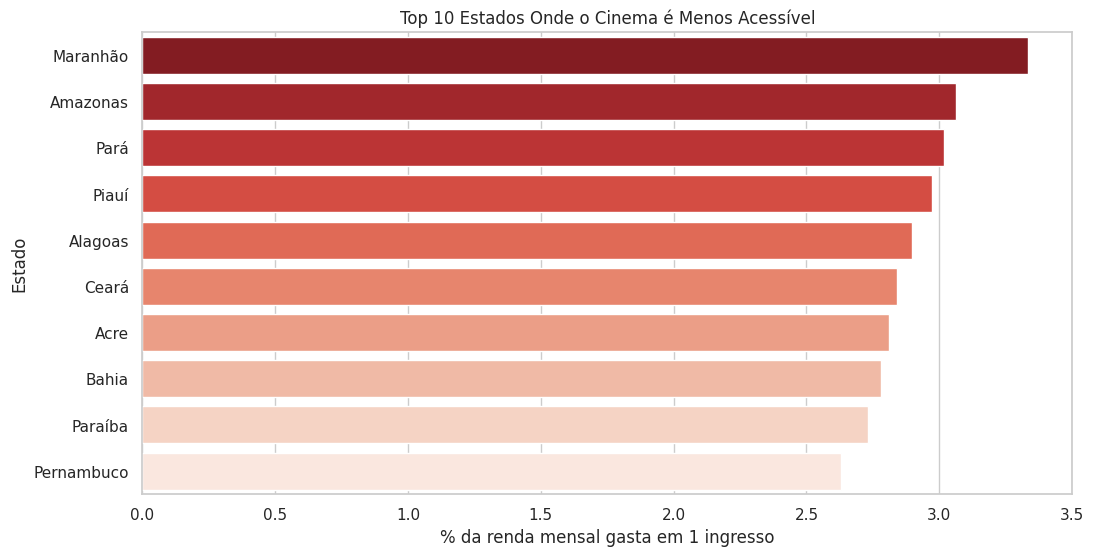

In [11]:
plt.figure(figsize=(12,6))

sns.barplot(
    data=top10,
    y='estado',
    x='iaec_percentual',
    palette='Reds_r'
)

plt.xlabel('% da renda mensal gasta em 1 ingresso')
plt.ylabel('Estado')
plt.title('Top 10 Estados Onde o Cinema é Menos Acessível')

plt.show()

## Estados onde o cinema é mais acessível

/tmp/ipython-input-1309/3497531175.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


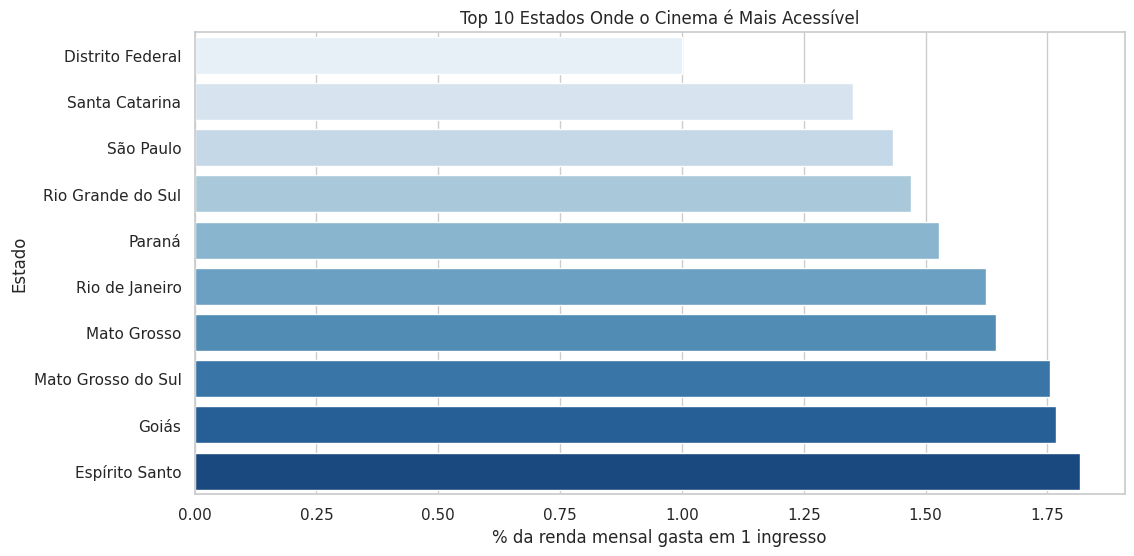

In [12]:
bottom10 = df_estados.sort_values(by='iaec_percentual').head(10)

plt.figure(figsize=(12,6))

sns.barplot(
    data=bottom10,
    y='estado',
    x='iaec_percentual',
    palette='Blues'
)

plt.xlabel('% da renda mensal gasta em 1 ingresso')
plt.ylabel('Estado')
plt.title('Top 10 Estados Onde o Cinema é Mais Acessível')

plt.show()

## Distribuição da acessibilidade no Brasil

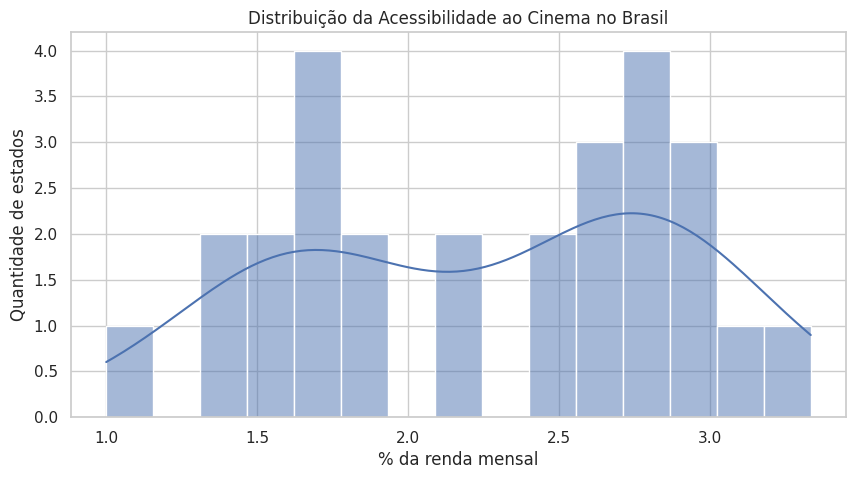

In [13]:
plt.figure(figsize=(10,5))

sns.histplot(df_estados['iaec_percentual'], bins=15, kde=True)

plt.xlabel('% da renda mensal')
plt.ylabel('Quantidade de estados')
plt.title('Distribuição da Acessibilidade ao Cinema no Brasil')

plt.show()

## Classificação por nível de acessibilidade

In [15]:
def classificar_acessibilidade(x):
    if x <= 1:
        return 'Alta acessibilidade'
    elif x <= 2:
        return 'Média acessibilidade'
    else:
        return 'Baixa acessibilidade'

df_estados['categoria'] = df_estados['iaec_percentual'].apply(classificar_acessibilidade)

df_estados['categoria'].value_counts()

,count
categoria,
Baixa acessibilidade,16
Média acessibilidade,11


## Gráfico de categorias

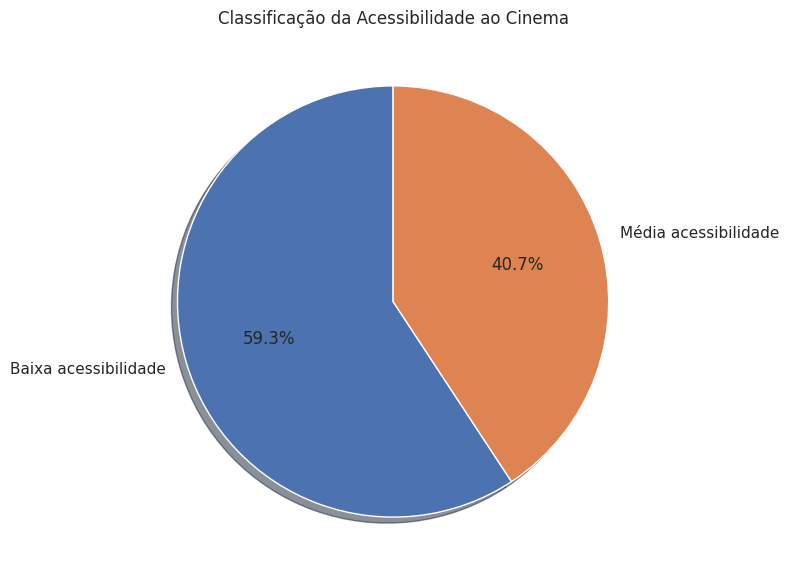

In [16]:
plt.figure(figsize=(7,7))

df_estados['categoria'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    shadow=True
)

plt.title('Classificação da Acessibilidade ao Cinema')
plt.ylabel('')

plt.show()

## Municípios — Extremos

### Mais inacessíveis

In [17]:
df_municipios.sort_values(by='iaec_percentual', ascending=False).head(10)

,municipio,uf,renda_per_capita,iaec_percentual
150,Uiramutã,RR,288.65,10.393210
165,Bagre,PA,358.65,8.364701
1570,Manari,PE,359.10,8.354219
477,Belágua,MA,388.46,7.722803
492,Cachoeira Grande,MA,389.45,7.703171
126,São Paulo de Olivença,AM,396.95,7.557627
604,Primeira Cruz,MA,413.00,7.263923
535,Humberto de Campos,MA,415.69,7.216916
560,Marajá do Sena,MA,425.87,7.044403
132,Tonantins,AM,432.01,6.944284


### Mais acessíveis

In [18]:
df_municipios.sort_values(by='iaec_percentual').head(10)

,municipio,uf,renda_per_capita,iaec_percentual
2763,Nova Lima,MG,4299.91,0.697689
3812,São Caetano do Sul,SP,3884.58,0.772284
4398,Florianópolis,SC,3636.13,0.825053
4337,Balneário Camboriú,SC,3583.85,0.837089
3222,Niterói,RJ,3577.32,0.838617
3795,Santana de Parnaíba,SP,3465.07,0.865783
4468,Marema,SC,3440.45,0.871979
3174,Vitória,ES,3351.64,0.895084
4504,Petrolândia,SC,3308.39,0.906785
4588,Tunápolis,SC,3288.15,0.912367


## Correlação Renda × Acessibilidade

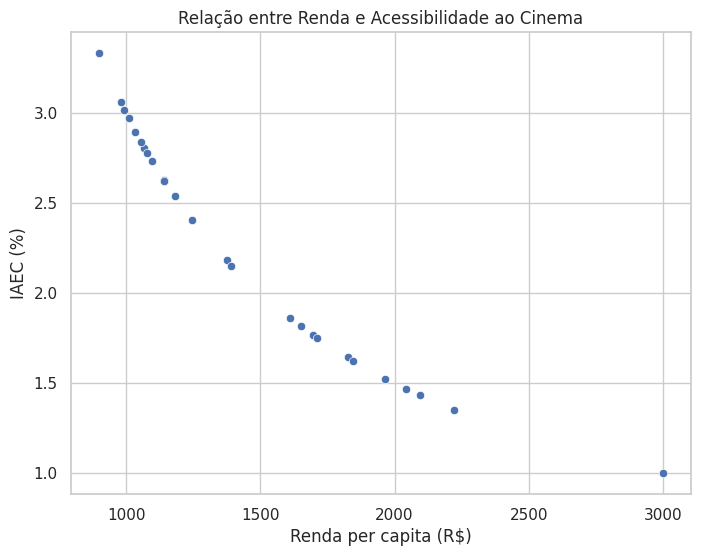

In [19]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    data=df_estados,
    x='renda_per_capita',
    y='iaec_percentual'
)

plt.xlabel('Renda per capita (R$)')
plt.ylabel('IAEC (%)')
plt.title('Relação entre Renda e Acessibilidade ao Cinema')

plt.show()

## Conclusões:

A análise evidencia uma forte desigualdade regional no acesso ao cinema no Brasil.

Estados com menor renda per capita apresentam maior percentual da renda comprometida
com um único ingresso, indicando barreiras econômicas relevantes no acesso à cultura.

A renda per capita mostra forte correlação negativa com o índice de acessibilidade,
confirmando que o cinema ainda é um privilégio mais acessível às regiões de maior
poder aquisitivo.
